In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
airline_df = pd.read_excel("Airlines+Data.xlsx")
airline_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## EDA

In [3]:
#column datatypes in the dataframe
airline_df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

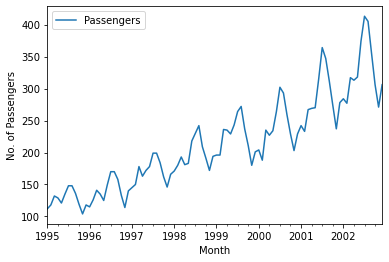

In [4]:
#data visualization, Passengers over the years
airline_df.plot("Month","Passengers", ylabel="No. of Passengers");

In [5]:
#Creating a month and year column in the dataframe
airline_df_eda = airline_df.copy()
airline_df_eda["year"] = airline_df.Month.dt.strftime("%Y")
airline_df_eda["month_of_year"] = airline_df.Month.dt.strftime("%b")
airline_df_eda.head()

,Month,Passengers,year,month_of_year
0,1995-01-01,112,1995,Jan
1,1995-02-01,118,1995,Feb
2,1995-03-01,132,1995,Mar
3,1995-04-01,129,1995,Apr
4,1995-05-01,121,1995,May


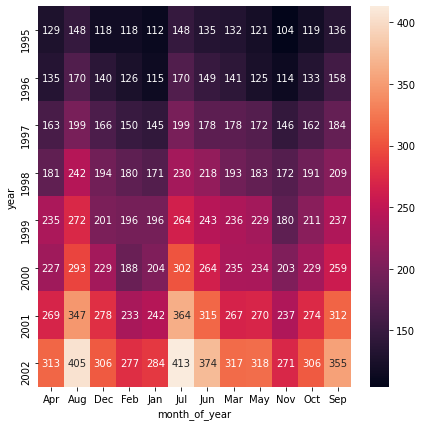

In [6]:
#hearmap of passengers over the years
plt.figure(figsize=(7,7))
heatmap_y_month = pd.pivot_table(data=airline_df_eda,values="Passengers", index="year", columns="month_of_year")
sns.heatmap(heatmap_y_month, fmt="g",annot=True);

In [7]:
airline_df_eda.head()

,Month,Passengers,year,month_of_year
0,1995-01-01,112,1995,Jan
1,1995-02-01,118,1995,Feb
2,1995-03-01,132,1995,Mar
3,1995-04-01,129,1995,Apr
4,1995-05-01,121,1995,May


In [8]:
#Dummy varibale creation
airline_df_eda = pd.concat([airline_df_eda.iloc[:,1:], pd.get_dummies(airline_df_eda.month_of_year)],axis=1)
airline_df_eda.head()

,Passengers,year,month_of_year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0


### 12 Dummy variables are created for Months but only 11 will be used in the model

In [9]:
#Adding varibales for time sequence, expontial model, quadratic model
airline_df_eda["t"] = airline_df_eda.index + 1
airline_df_eda["log_Passengers"] = airline_df_eda["Passengers"].apply(np.log)
airline_df_eda["t_square"] = pow(airline_df_eda["t"],2)
airline_df_eda.head()

,Passengers,year,month_of_year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,log_Passengers,t_square
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499,1
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4.770685,4
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,4.882802,9
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,4.859812,16
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0,5,4.795791,25


In [10]:
airline_df_eda.shape

(96, 18)

In [11]:
#Splitting of data
train = airline_df_eda.head(84)
test = airline_df_eda.tail(12)

In [12]:
train.head()

,Passengers,year,month_of_year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,log_Passengers,t_square
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499,1
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4.770685,4
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,4.882802,9
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,4.859812,16
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0,5,4.795791,25


## Models

In [13]:
#linear models
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import math

linear_model = smf.ols("Passengers ~ t", data=train).fit()
pred_linear = linear_model.predict(test.t)
rmse_linear = math.sqrt(mean_squared_error(test.Passengers, pred_linear))
rmse_linear

53.199236534802715

In [14]:
#Exponential model

exp_model = smf.ols("log_Passengers ~ t", data=train).fit()
pred_exp = exp_model.predict(test.t)
rmse_exp = math.sqrt(mean_squared_error(test.Passengers, np.exp(pred_exp)))
rmse_exp

46.0573611031562

In [15]:
#Quadratic 

quad_model = smf.ols("Passengers~t+t_square", data=train).fit()
pred_quad = quad_model.predict(test[["t", "t_square"]])
rmse_quad = math.sqrt(mean_squared_error(test.Passengers, pred_quad))
rmse_quad

48.051888979330975

In [16]:
#Additive seasonality

add_sea_model = smf.ols("Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data=train).fit()
pred_add_sea = add_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_add_sea = math.sqrt(mean_squared_error(test.Passengers, pred_add_sea))
rmse_add_sea

132.81978481421817

In [17]:
# Additive Seasonality with Quadratic 

add_quad_model = smf.ols("Passengers ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data=train).fit()
pred_add_quad = add_quad_model.predict(test[["t", "t_square",'Jan','Feb','Mar','Apr','May','Jun',
                                             'Jul','Aug','Sep','Oct','Nov']])
rmse_add_quad = math.sqrt(mean_squared_error(test.Passengers, pred_add_quad))
rmse_add_quad

26.360817612086706

In [18]:
#Multiplicative Seasonality

mul_sea_model = smf.ols("log_Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data=train).fit()
pred_mul_sea = mul_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_mul_sea = math.sqrt(mean_squared_error(test.Passengers, np.exp(pred_exp)))
rmse_mul_sea

46.0573611031562

In [19]:
#Multiplicative Seasonality with quadratic

mul_sea_q_model = smf.ols("log_Passengers ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data=train).fit()
pred_mul_sea_q = mul_sea_q_model.predict(test[["t","t_square",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                                               'Sep','Oct','Nov']])
rmse_mul_sea_q = math.sqrt(mean_squared_error(test.Passengers, np.exp(pred_mul_sea_q)))
rmse_mul_sea_q

18.372010618224653

### ARIMA Model

In [20]:
#Gridsearch to find the best parameter
from statsmodels.tsa.arima_model import ARIMA

X = airline_df_eda[["Passengers", "t"]]
X = X.astype('float32')
train_arima = X.head(84)
test_arima = X.tail(12)
    
def evaluate_arima_model(order):
    model = ARIMA(train_arima.Passengers, order=order).fit()
    pred = model.forecast(steps=12)[0]
    rmse_value = math.sqrt(mean_squared_error(test_arima.Passengers, pred))
    return rmse_value

def evaluate_model(p_values, d_values, q_values):
    rmse_df = pd.DataFrame()
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse  = evaluate_arima_model(order)
                    rmse_df = rmse_df.append({"order":order, "rmse_value":rmse}, ignore_index=True)
                except:
                    continue
    return rmse_df

In [21]:
import warnings
p_values = list(range(0, 5))
d_values = list(range(0, 5))
q_values = list(range(0, 5))
warnings.filterwarnings("ignore")
result = evaluate_model(p_values, d_values, q_values)

In [22]:
#Best parameter for ARIMA model
result.sort_values("rmse_value").head(1)

,order,rmse_value
56,"(4, 1, 4)",39.984256


In [23]:
#ARIMA MODEL
arima_model = ARIMA(train_arima.Passengers, order=(4,1,4)).fit()
predict = arima_model.forecast(steps=12)[0]
rmse_arima = math.sqrt(mean_squared_error(test_arima.Passengers, predict))
np.round(rmse_arima,2)

39.98

In [24]:
#Compare the results
rmse_data = {"model":pd.Series(["linear_model","exp_model","quad_model","add_sea_model","add_quad_model","mul_sea_model",
                               "mul_sea_q_model","arima_model"]), 
             "RMSE Value": pd.Series([rmse_linear, rmse_exp, rmse_quad,rmse_add_sea, rmse_add_quad, rmse_mul_sea,
                                      rmse_mul_sea_q, rmse_arima])}
table_rmse = pd.DataFrame(rmse_data)
table_rmse.sort_values(["RMSE Value"])

,model,RMSE Value
6,mul_sea_q_model,18.372011
4,add_quad_model,26.360818
7,arima_model,39.984256
1,exp_model,46.057361
5,mul_sea_model,46.057361
2,quad_model,48.051889
0,linear_model,53.199237
3,add_sea_model,132.819785


### From the above results Multiplicative seasonality with qudratic model is best suited for this data